In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 10)
set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
URL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

heart_data <- read_csv(URL, col_names=FALSE, show_col_types = FALSE)
colnames(heart_data) <- c("age", "sex", "cp", "trestbps", 
                              "chol", "fbs", "restecg", "thalach", 
                              "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_data <- heart_data |>
                    mutate(ca = as_factor(ca), thal = as_factor(thal), num = as_factor(num))
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [15]:
heart_have_disease <- heart_data |>
    filter(num == 1 | num == 2 | num == 3 | num == 4) |>
    mutate(num_alt = 1) |>
    mutate(num_alt = as_factor(num_alt))
heart_data_copy <- heart_data
heart_no_disease <- heart_data |>
    filter(num == 0) |>
    mutate(num_alt = 0) |>
    mutate(num_alt = as_factor(num_alt))
heart_data_alt <- rbind(heart_have_disease, heart_no_disease)
heart_data_alt

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num_alt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,1
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,1
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,2,130,221,0,2,163,0,0.0,1,0.0,7.0,0,0
56,1,2,120,240,0,0,169,0,0.0,3,0.0,3.0,0,0
55,0,2,132,342,0,0,166,0,1.2,1,0.0,3.0,0,0


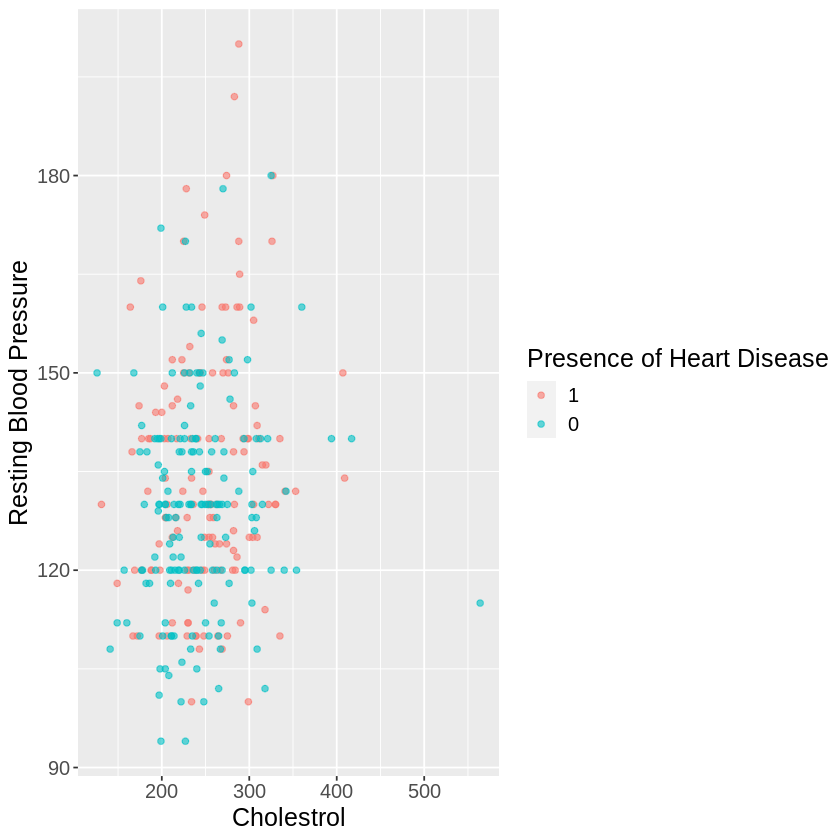

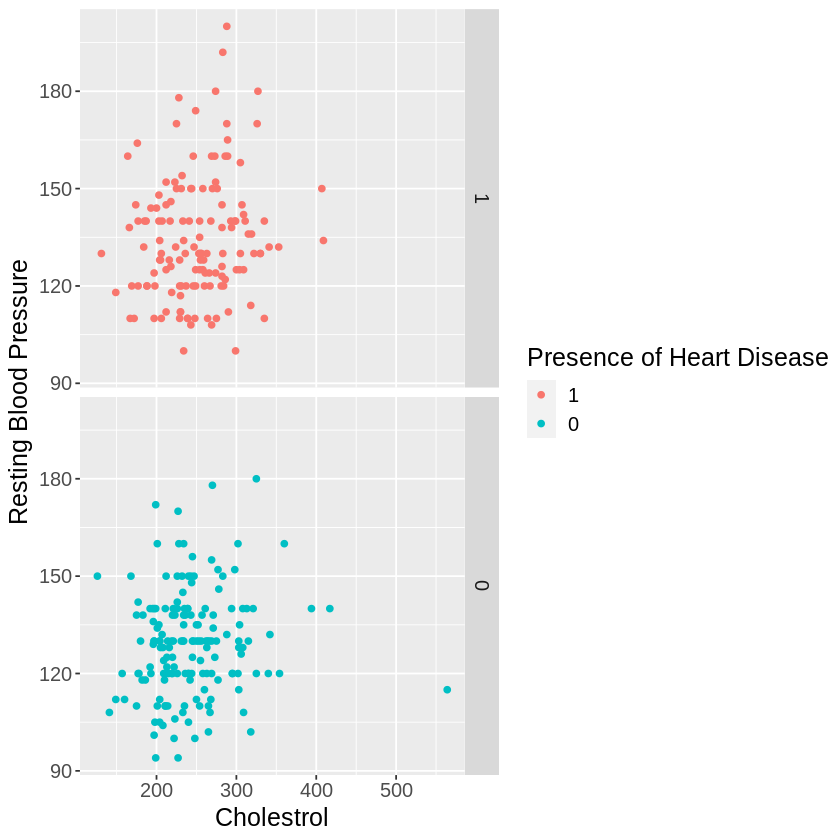

In [30]:
chol_vs_trestbps1 <- heart_data_alt |>
                    ggplot(aes(x = chol, y = trestbps, color = num_alt)) +
                    geom_point(alpha = 0.6) +
                    #facet_grid(rows = vars(num_alt)) +
                    labs(x = "Cholestrol", y = "Resting Blood Pressure", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
chol_vs_trestbps1

chol_vs_trestbps2 <- heart_data_alt |>
                    ggplot(aes(x = chol, y = trestbps, color = num_alt)) +
                    geom_point(alpha = 1) +
                    facet_grid(rows = vars(num_alt)) +
                    labs(x = "Cholestrol", y = "Resting Blood Pressure", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
chol_vs_trestbps2

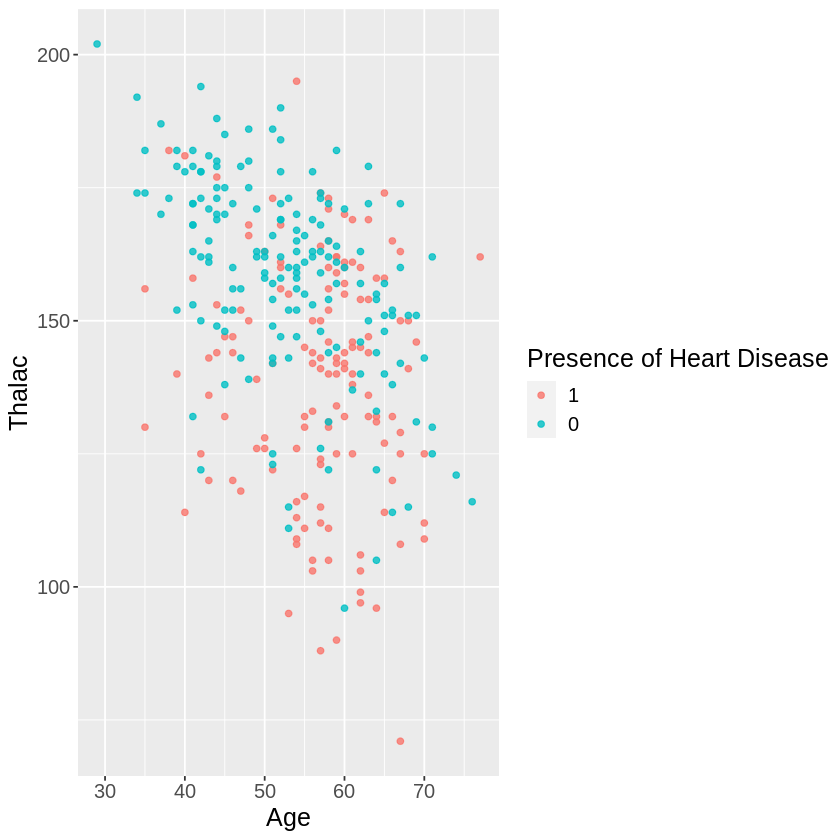

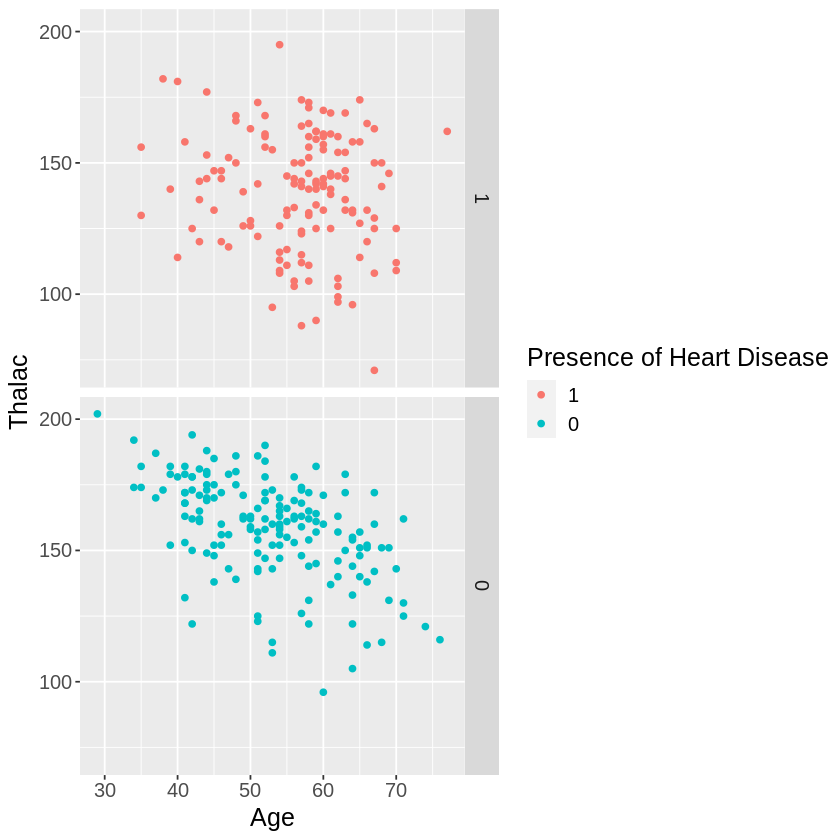

In [31]:
age_vs_thalac1 <- heart_data_alt |>
                    ggplot(aes(x = age, y = thalach, color = num_alt)) +
                    geom_point(alpha = .8) +
                    #facet_grid(rows = vars(num_alt)) +
                    labs(x = "Age", y = "Thalac", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
age_vs_thalac1

age_vs_thalac2 <- heart_data_alt |>
                    ggplot(aes(x = age, y = thalach, color = num_alt)) +
                    geom_point(alpha = 1) +
                    facet_grid(rows = vars(num_alt)) +
                    labs(x = "Age", y = "Thalac", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
age_vs_thalac2

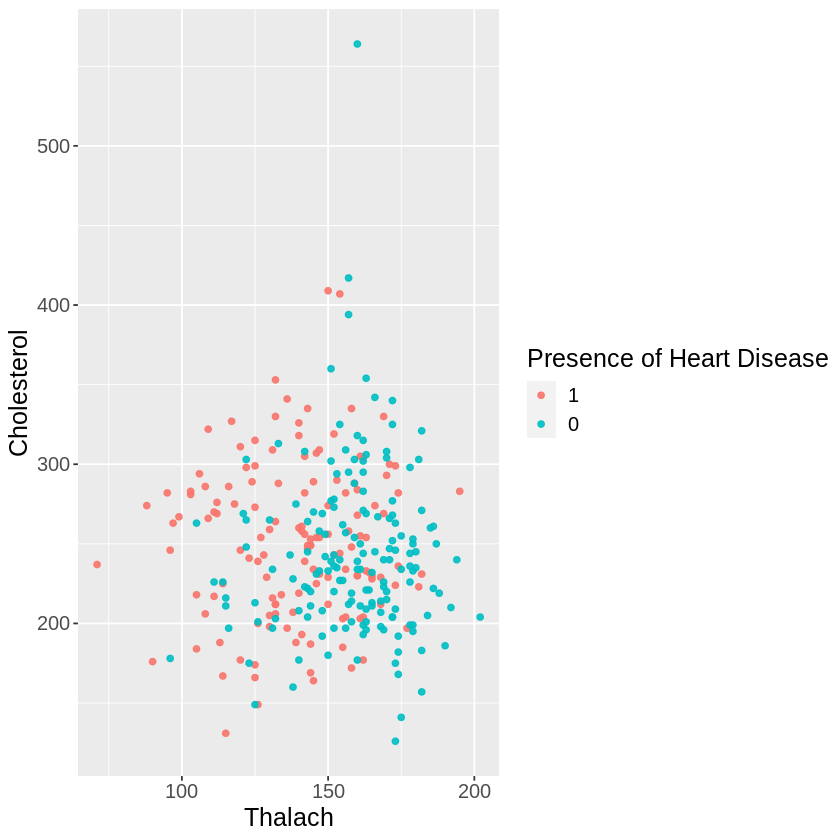

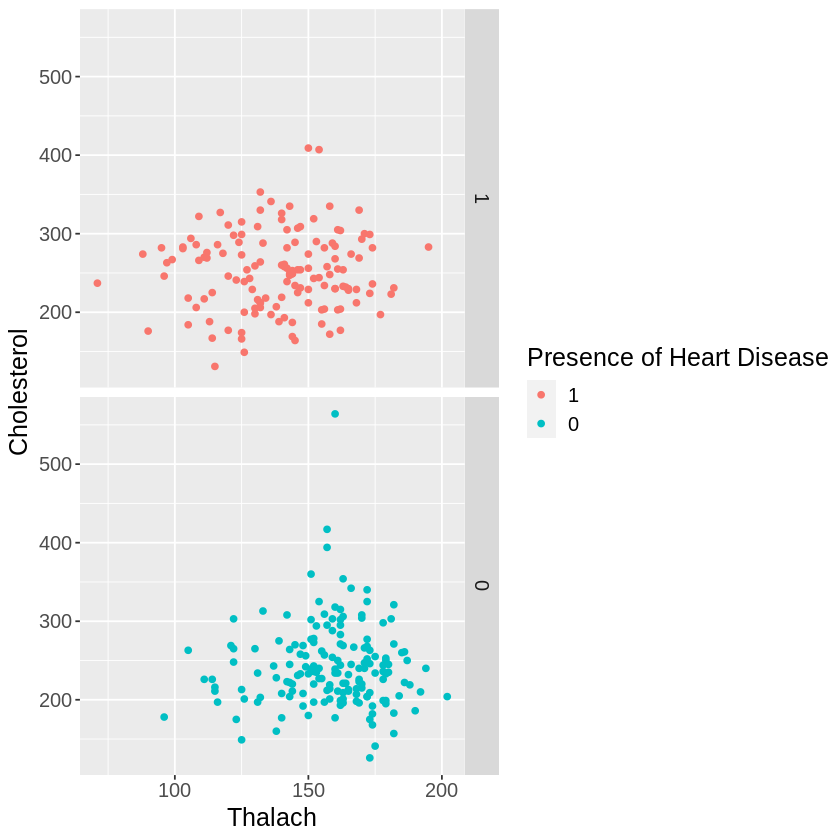

In [33]:
age_vs_oldpeak <- heart_data_alt |>
                    ggplot(aes(x = thalach, y = chol, color = num_alt)) +
                    geom_point(alpha = .9) +
                    #facet_grid(rows = vars(num_alt)) +
                    labs(x = "Thalach", y = "Cholesterol", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
age_vs_oldpeak

age_vs_oldpeak2 <- heart_data_alt |>
                    ggplot(aes(x = thalach, y = chol, color = num_alt)) +
                    geom_point(alpha = 1) +
                    facet_grid(rows = vars(num_alt)) +
                    labs(x = "Thalach", y = "Cholesterol", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
age_vs_oldpeak2

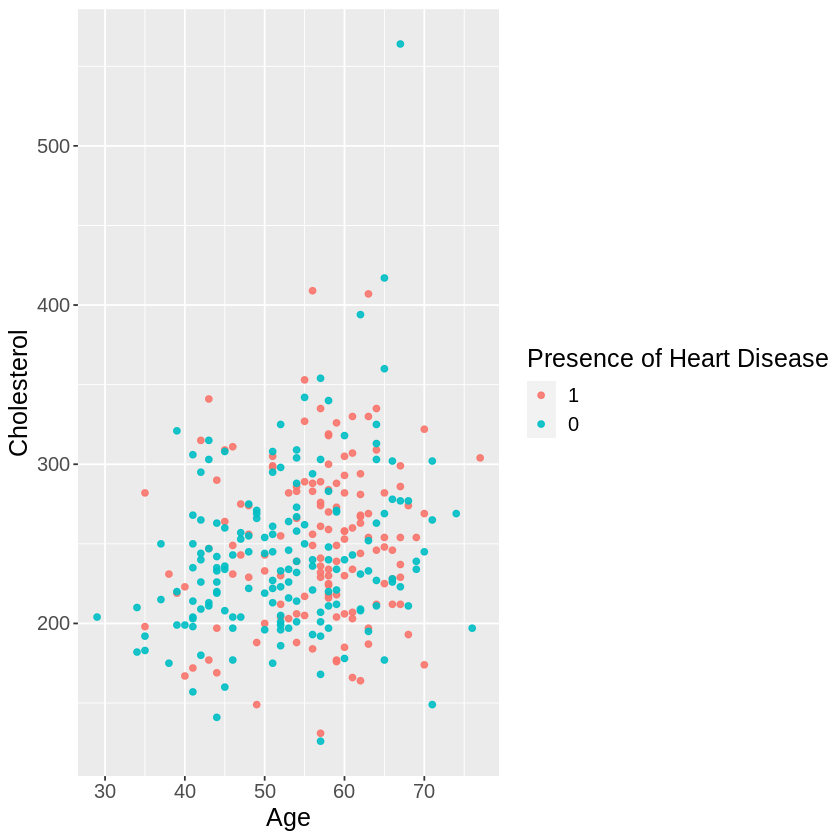

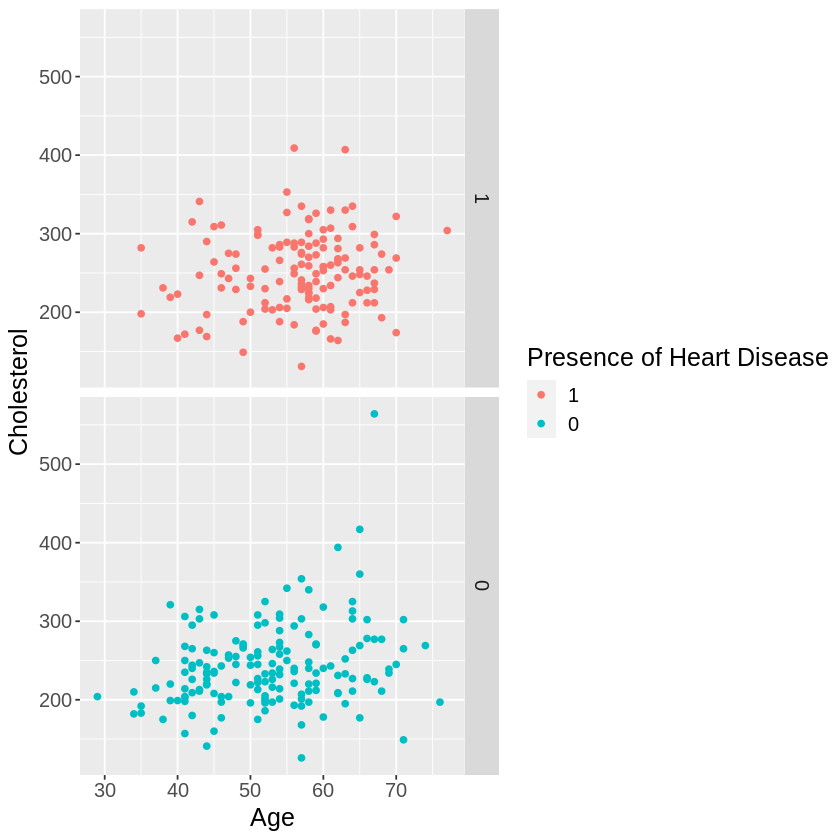

In [34]:
age_vs_chol1 <- heart_data_alt |>
                    ggplot(aes(x = age, y = chol, color = num_alt)) +
                    geom_point(alpha = .9) +
                    #facet_grid(rows = vars(num_alt)) +
                    labs(x = "Age", y = "Cholesterol", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
age_vs_chol1

age_vs_chol2 <- heart_data_alt |>
                    ggplot(aes(x = age, y = chol, color = num_alt)) +
                    geom_point(alpha = 1) +
                    facet_grid(rows = vars(num_alt)) +
                    labs(x = "Age", y = "Cholesterol", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
age_vs_chol2